# CrowdTruth for Sparse Multiple Choice Tasks: Event Extraction

In [15]:
import pandas as pd

file_name = "f1323744_things_allmotivation"
test_data = pd.read_csv("../../data/pilot_crowd_data/raw_data/" + file_name + ".csv")
test_data.head()

,_unit_id,_created_at,_id,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,...,doc_id,gold_total_events,hiddeninput_gold,lowercase_sentence,notpossible_gold,possible_gold,selectedtags_desc_gold,sentence,sentence_id,tokens
0,2020540343,11/22/2018 16:13:44,4272465618,11/22/2018 16:13:04,False,prodege,1,e1348a79a458a304fb5c1eaa37e3d459,CAN,ON,...,nyt_20130321_sarkozy,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
1,2020540343,11/22/2018 16:27:26,4272502600,11/22/2018 16:27:08,False,prodege,1,6bf9daffaf6238ab026dd2dababe3a5e,CAN,ON,...,nyt_20130321_sarkozy,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
2,2020540343,11/22/2018 16:51:46,4272589968,11/22/2018 16:50:59,False,elite,1,fd4c8cbeb7fe01499480d1344c50df5f,CAN,BC,...,nyt_20130321_sarkozy,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
3,2020540343,11/22/2018 17:44:44,4272738968,11/22/2018 17:44:33,False,prodege,1,d4ea94442353cb59b9cd510e3faf67e2,CAN,NS,...,nyt_20130321_sarkozy,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47
4,2020540343,11/22/2018 18:02:43,4272795311,11/22/2018 18:00:34,False,neodev,1,fc9c9fa63b30fe0a549876f890baee33,GBR,B7,...,nyt_20130321_sarkozy,6,NaN,former president nicolas sarkozy was informed ...,NaN,NaN,NaN,Former President Nicolas Sarkozy was informed ...,0,47


## Declaring a pre-processing configuration

The pre-processing configuration defines how to interpret the raw crowdsourcing input. To do this, we need to define a configuration class. First, we import the default CrowdTruth configuration class:

In [16]:
import crowdtruth
from crowdtruth.configuration import DefaultConfig

Our test class inherits the default configuration `DefaultConfig`, while also declaring some additional attributes that are specific to the Relation Extraction task:

* **`inputColumns`:** list of input columns from the .csv file with the input data
* **`outputColumns`:** list of output columns from the .csv file with the answers from the workers
* **`annotation_separator`:** string that separates between the crowd annotations in `outputColumns`
* **`open_ended_task`:** boolean variable defining whether the task is open-ended (i.e. the possible crowd annotations are not known beforehand, like in the case of free text input); in the task that we are processing, workers pick the answers from a pre-defined list, therefore the task is not open ended, and this variable is set to `False`
* **`annotation_vector`:** list of possible crowd answers, mandatory to declare when `open_ended_task` is `False`; for our task, this is the list of all relations that were given as input to the crowd in at least one sentence
* **`processJudgments`:** method that defines processing of the raw crowd data; for this task, we process the crowd answers to correspond to the values in `annotation_vector`

The complete configuration class is declared below:

In [17]:
class TestConfig(DefaultConfig):
    inputColumns = ["doc_id", "total_events_gold", "sentence", "lowercase_sentence", "sentence_id", "all_runs_events"]
    outputColumns = ["selectedtags_desc"]
    
    annotation_separator = ","
        
    # processing of a closed task
    open_ended_task = True
    
    def processJudgments(self, judgments):
        # pre-process output to match the values in annotation_vector
        for col in self.outputColumns:
            # transform to lowercase
            judgments[col] = judgments[col].apply(lambda x: str(x).lower())
            # remove square brackets from annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('[',''))
            judgments[col] = judgments[col].apply(lambda x: str(x).replace(']',''))
            # remove the quotes around the annotations
            judgments[col] = judgments[col].apply(lambda x: str(x).replace('"',''))
        return judgments

## Pre-processing the input data

After declaring the configuration of our input file, we are ready to pre-process the crowd data:

In [18]:
data_open, config = crowdtruth.load(
    file = "../../data/pilot_crowd_data/raw_data/" + file_name + ".csv",
    config = TestConfig()
)

data_open['judgments'].head()

,output.selectedtags_desc,output.selectedtags_desc.count,output.selectedtags_desc.unique,unit,worker,started,submitted,duration,job
judgment,,,,,,,,,
4272465618,"{'informed__37__45': 1, 'investigation__83__96...",3,3,2020540343,e1348a79a458a304fb5c1eaa37e3d459,2018-11-22 16:13:04,2018-11-22 16:13:44,40,../../data/pilot_crowd_data/raw_data/f1323744_...
4272502600,"{'face__69__73': 1, 'abused__113__119': 1}",2,2,2020540343,6bf9daffaf6238ab026dd2dababe3a5e,2018-11-22 16:27:08,2018-11-22 16:27:26,18,../../data/pilot_crowd_data/raw_data/f1323744_...
4272589968,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",6,6,2020540343,fd4c8cbeb7fe01499480d1344c50df5f,2018-11-22 16:50:59,2018-11-22 16:51:46,47,../../data/pilot_crowd_data/raw_data/f1323744_...
4272738968,"{'informed__37__45': 1, 'investigation__83__96...",2,2,2020540343,d4ea94442353cb59b9cd510e3faf67e2,2018-11-22 17:44:33,2018-11-22 17:44:44,11,../../data/pilot_crowd_data/raw_data/f1323744_...
4272795311,"{'informed__37__45': 1, 'face__69__73': 1, 'in...",6,6,2020540343,fc9c9fa63b30fe0a549876f890baee33,2018-11-22 18:00:34,2018-11-22 18:02:43,129,../../data/pilot_crowd_data/raw_data/f1323744_...


## Computing the CrowdTruth metrics

The pre-processed data can then be used to calculate the CrowdTruth metrics:

In [19]:
results_open = crowdtruth.run(data_open, config)

`results` is a dict object that contains the quality metrics for sentences, events and crowd workers.

The **sentence metrics** are stored in `results["units"]`:

In [20]:
results_open["units"].head()

,duration,input.all_runs_events,input.doc_id,input.lowercase_sentence,input.sentence,input.sentence_id,job,output.selectedtags_desc,output.selectedtags_desc.annotations,output.selectedtags_desc.unique_annotations,worker,uqs,unit_annotation_score,uqs_initial,unit_annotation_score_initial
unit,,,,,,,,,,,,,,,
2020540343,44.40,informed__37__45###face__69__73###investigatio...,nyt_20130321_sarkozy,former president nicolas sarkozy was informed ...,Former President Nicolas Sarkozy was informed ...,0,../../data/pilot_crowd_data/raw_data/f1323744_...,"{'informed__37__45': 17, 'investigation__83__9...",88,6,20,0.788339,"{'informed__37__45': 0.925614422861986, 'inves...",0.701515,"{'informed__37__45': 0.85, 'investigation__83_..."
2020540345,48.85,denied__16__22###accepting__23__32###alleged__...,nyt_20130321_sarkozy,mr. sarkozy has denied accepting illegal campa...,Mr. Sarkozy has denied accepting illegal campa...,1,../../data/pilot_crowd_data/raw_data/f1323744_...,"{'denied__16__22': 15, 'alleged__159__166': 15...",68,5,20,0.705696,"{'denied__16__22': 0.811348469280398, 'alleged...",0.643756,"{'denied__16__22': 0.75, 'alleged__159__166': ..."
2020540346,55.10,called__41__47###decision__61__69###indicates_...,nyt_20130321_sarkozy,"mr. sarkozy s lawyer , thierry herzog , called...","Mr. Sarkozy 's lawyer , Thierry Herzog , calle...",2,../../data/pilot_crowd_data/raw_data/f1323744_...,"{'called__41__47': 17, 'indicates__78__87': 13...",82,6,20,0.725654,"{'called__41__47': 0.9202311896696123, 'indica...",0.649282,"{'called__41__47': 0.85, 'indicates__78__87': ..."
2020540348,29.00,said__11__15###appeal__25__31###appeal .__25__33,nyt_20130321_sarkozy,the lawyer said he would appeal 0,The lawyer said he would appeal .,3,../../data/pilot_crowd_data/raw_data/f1323744_...,"{'said__11__15': 17, 'appeal__25__31': 11, 'ap...",35,3,20,0.677798,"{'said__11__15': 0.8803716957469481, 'appeal__...",0.630686,"{'said__11__15': 0.85, 'appeal__25__31': 0.55,..."
2020540349,52.05,ruling__4__10###mean__32__36###lost__60__64###...,nyt_20130321_sarkozy,the ruling does not necessarily mean that mr. ...,The ruling does not necessarily mean that Mr. ...,4,../../data/pilot_crowd_data/raw_data/f1323744_...,"{'ruling__4__10': 15, 'bid__81__84': 10, 'tria...",71,6,20,0.703211,"{'ruling__4__10': 0.8564815028433793, 'bid__81...",0.610202,"{'ruling__4__10': 0.75, 'bid__81__84': 0.5, 't..."


The `uqs` column in `results["units"]` contains the **sentence quality scores**, capturing the overall workers agreement over each sentence. Here we plot its histogram:

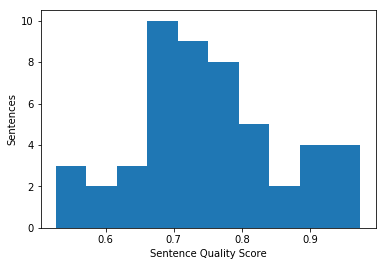

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(results_open["units"]["uqs"])
plt.xlabel("Sentence Quality Score")
plt.ylabel("Sentences")


The `unit_annotation_score` column in `results["units"]` contains the **sentence-relation scores**, capturing the likelihood that a relation is expressed in a sentence. For each sentence, we store a dictionary mapping each relation to its sentence-relation score.

In [22]:
results_open["units"]["unit_annotation_score"].head(10)

unit
2020540343    {'informed__37__45': 0.925614422861986, 'inves...
2020540345    {'denied__16__22': 0.811348469280398, 'alleged...
2020540346    {'called__41__47': 0.9202311896696123, 'indica...
2020540348    {'said__11__15': 0.8803716957469481, 'appeal__...
2020540349    {'ruling__4__10': 0.8564815028433793, 'bid__81...
2020540350    {'accused__23__30': 0.8896094529943992, 'death...
2020540351    {'reported__57__65': 0.9373773752221901, 'miss...
2020540352    {'search__31__37': 0.7176467355408087, 'said__...
2020540353    {'pulled__32__38': 0.8977296291357492, 'showed...
2020540354    {'collect__40__47': 0.7684922109325123, 'start...
Name: unit_annotation_score, dtype: object

The **worker metrics** are stored in `results["workers"]`:

In [23]:
results_open["workers"].head()

,unit,judgment,job,duration,wqs,wwa,wsa,wqs_initial,wwa_initial,wsa_initial
worker,,,,,,,,,,
07fe811ad57531a29d0ce82daedb4ad7,40,40,1,137.425000,0.490276,0.666195,0.735934,0.449118,0.620970,0.723252
0a3302e56f7d6a1edc99700f53076e2d,50,50,1,28.920000,0.786607,0.832750,0.944589,0.725385,0.775804,0.935012
1278d048db9733b5f2edcec989861c6a,16,16,1,77.125000,0.459096,0.641095,0.716112,0.389782,0.569508,0.684418
19d1cf4672a44a2b873901990979111a,24,24,1,29.208333,0.468804,0.643735,0.728256,0.419055,0.588987,0.711484
1ffcb4b845f71b6e949a4786ea4e376f,19,19,1,37.157895,0.826686,0.858181,0.963301,0.771372,0.805679,0.957418


The `wqs` columns in `results["workers"]` contains the **worker quality scores**, capturing the overall agreement between one worker and all the other workers.

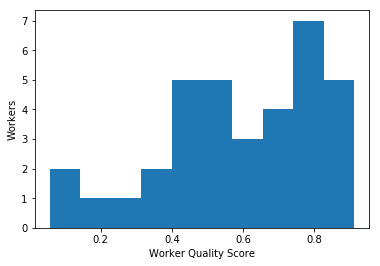

In [24]:
plt.hist(results_open["workers"]["wqs"])
plt.xlabel("Worker Quality Score")
plt.ylabel("Workers")

## Save crowd results in a csv file

In [25]:
rows = []
header = list(results_open["units"])
header.extend(["validated_event", "no_of_annotations", "validated_event_final_score", "validated_event_initial_score"])

rows.append(header)

for i in range(len(results_open["units"].index)):
    keys = []
    all_event_runs = results_open["units"]["input.all_runs_events"].iloc[i].lower().split("###")
    keys.extend(all_event_runs)
    keys.append("no_event")
    
    for j in range(len(keys)):
        row = list(results_open["units"].iloc[i])
        row.append(keys[j])
        row.append(results_open["units"]["output.selectedtags_desc"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score"].iloc[i][keys[j].lower()])
        row.append(results_open["units"]["unit_annotation_score_initial"].iloc[i][keys[j].lower()])
    
        rows.append(row)
        
        
import csv

with open('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

## Comparison with Expert Annotations

In [26]:
# expert annotations in TempEval-3 Platinum dataset
import numpy as np
           
expert_data = pd.read_csv("../../data/TempEval3-data/TE3-Platinum_events.csv")
crowd_data = pd.read_csv("../../data/pilot_crowd_data/results/"+ file_name + "_units_open.csv")
crowd_data["Experts"] = pd.Series(np.random.randn(len(crowd_data.index)), index=crowd_data.index)

for i in range(len(crowd_data.index)):
    subset = expert_data[(expert_data["Doc Id"].str.lower() == crowd_data["input.doc_id"].iloc[i].lower()) & (expert_data["Sentence Id"] == crowd_data["input.sentence_id"].iloc[i])]# & (str(str(expert_data["Lowercase Token"]) + "__" + str(expert_data["Start Offset"]) + "__" + str(expert_data["End Offset"])) == str(crowd_data["validated_event"].iloc[i]))]
    found = False
    for j in range(len(subset.index)):
        if str(str(subset["Lowercase Token"].iloc[j]) + "__" + str(subset["Start Offset"].iloc[j]) + "__" + str(subset["End Offset"].iloc[j])) == crowd_data["validated_event"].iloc[i]:
            found = True
    if found == True:
        crowd_data["Experts"].iloc[i] = 1
    else:
        crowd_data["Experts"].iloc[i] = 0
crowd_data.to_csv("../../data/pilot_crowd_data/results/" + file_name + "_units_open.csv", index=False)    


/Users/oanainel/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
import eval_crowd_results as eval_script

crowd = pd.read_csv('../../data/pilot_crowd_data/results/' + file_name + '_units_open.csv')
eval_file = eval_script.compute_crowd_performance(crowd, "validated_event_final_score")
     
with open('../../data/pilot_crowd_data/results/eval_' + file_name + '_units_open.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(eval_file)
    
eval_main = pd.read_csv("../../data/pilot_crowd_data/results/eval_" + file_name + "_units_open.csv")
eval_main

,Thresh,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-score
0,0.05,164,50,47,0,0.777251,1.000000,0.819923,0.874667
1,0.10,164,51,46,0,0.780952,1.000000,0.823755,0.877005
2,0.15,164,52,45,0,0.784689,1.000000,0.827586,0.879357
3,0.20,164,52,45,0,0.784689,1.000000,0.827586,0.879357
4,0.25,163,53,44,1,0.787440,0.993902,0.827586,0.878706
5,0.30,159,56,41,5,0.795000,0.969512,0.823755,0.873626
6,0.35,158,61,36,6,0.814433,0.963415,0.839080,0.882682
7,0.40,157,62,35,7,0.817708,0.957317,0.839080,0.882022
8,0.45,157,69,28,7,0.848649,0.957317,0.865900,0.899713
9,0.50,153,73,24,11,0.864407,0.932927,0.865900,0.897361
